In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import geopandas as gpd

In [7]:
path='data-6/'


## Question 1.  (33 pts)

Let's explore clustering models on an artificial data set with five features.

In [8]:
data1=pd.read_csv(path+'hw4data1.csv')
data1.head()

,1,2,3,4,5
0,0.624358,-0.007694,0.157510,0.440554,0.157423
1,-0.065098,-0.000790,0.271934,0.224854,0.158883
2,-0.086525,-0.280988,-0.025699,0.263920,0.421017
3,-0.581743,-0.275640,-0.290320,-0.213967,0.497857
4,0.170606,1.020045,-0.583633,0.887644,0.105641


In [15]:
data1.shape

(100, 5)

#### a) First, guess the number of clusters we could have. 
probably 4 based on the visualization below; although a small possible fifth cluster can be also noticed

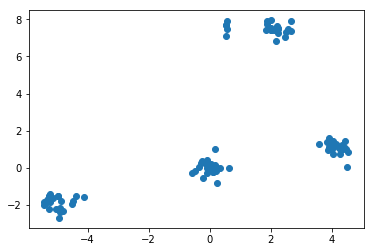

In [5]:
plt.scatter(data1.iloc[:,0],data1.iloc[:,1])### 第一二列，：是选择全部

#### b) Use K-means to cluster the original data based on your guess for the number of clusters. Report the resulting labels. 

In [7]:
rr=KMeans(n_clusters=4).fit(data1)
rr.labels_

array([0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

#### c) Visualize the clustering result and color the points according to the labels obtained in part b). (5 pts)
hint: you can use the first two columns only

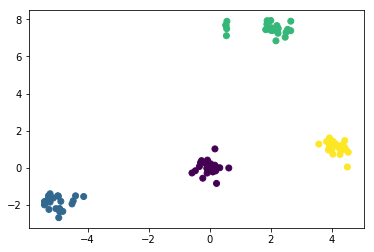

In [9]:
plt.scatter(data1.iloc[:,0],data1.iloc[:,1],c=rr.labels_)

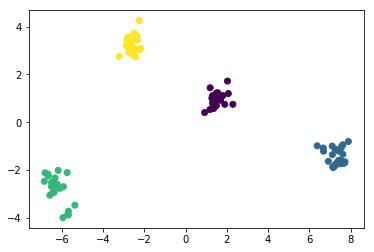

In [10]:
#another visualization option using PCA
from sklearn.decomposition import PCA
pca=PCA(2)
Xproj=pca.fit_transform(data1)
plt.scatter(Xproj[:,0],Xproj[:,1],c=rr.labels_)
plt.show()

#### d) Justify your guess for k (the optimal number of clusters for K-means clustering) by first using silhouette_score and then the Elbow method on the original data. Briefly explain your approach. Are your results consistent? (12 pts)

In [11]:
# Silhouette
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.cm as cm

X=data1
range_n_clusters = [2,3,4,5,6,7,8,9]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print('For n_clusters = {} the average silhouette_score is: {}'.format(n_clusters, silhouette_avg))
    sample_silhouette_values = silhouette_samples(X, cluster_labels)


For n_clusters = 2 the average silhouette_score is: 0.568264548026
For n_clusters = 3 the average silhouette_score is: 0.721564618574
For n_clusters = 4 the average silhouette_score is: 0.832894602225
For n_clusters = 5 the average silhouette_score is: 0.760179723477
For n_clusters = 6 the average silhouette_score is: 0.604840988647
For n_clusters = 7 the average silhouette_score is: 0.442467808437
For n_clusters = 8 the average silhouette_score is: 0.380204648442
For n_clusters = 9 the average silhouette_score is: 0.386761243614


#### When n=4, the ss reaches max. So we choose k=4.

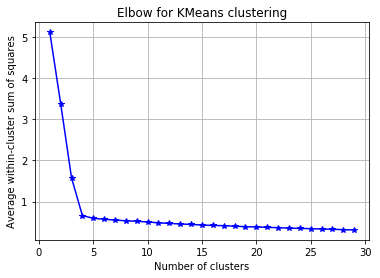

In [12]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

def elbow(data,K,k_opt=2):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.

    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    centroids = [k.cluster_centers_ for k in KM]

    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    cIdx = [np.argmin(D,axis=1) for D in D_k]
    dist = [np.min(D,axis=1) for D in D_k]
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]

    # Total with-in sum of square
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss

    kIdx = 10-1

    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
#     ax.plot(K[k_opt], avgWithinSS[k_opt], marker='o', markersize=12,
#             markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()

elbow(data1, range(1,30))

#### e) Using a Gaussian Mixture model instead of K-means (but with the same value for k), repeat parts b) and c). (8 pts)

In [13]:
from sklearn.mixture import GaussianMixture
gm=GaussianMixture(n_components=4)
res1=gm.fit(data1).predict(data1)
res1

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

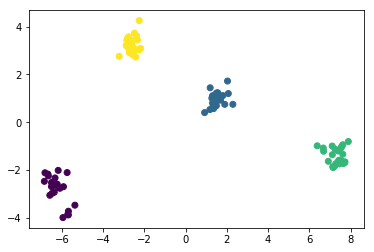

In [14]:
plt.scatter(Xproj[:,0],Xproj[:,1],c=res1)
plt.show()

## Question 2. (14 pts)

The following data comes from a larger set detailing every motor vehicle collision in NYC (available [here](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95)). This particular subset only considers collisions that occurred on October 31, 2017.

You have 680 collision records in the file ‘NYPD_Motor_Vehicle_Collisions_Duplicates.csv’, but you realize that some of these are actually duplicates resulting from a technical error. You know that there are approximately 620 unique records in the file, but you want to determine the exact number.

In [17]:
data2=pd.read_csv(path+'NYPD_Motor_Vehicle_Collisions_Duplicates.csv').fillna('')
data2.head()


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,10/31/2017,0:00,,,40.7331,-73.9548,"(40.733135, -73.954765)",MANHATTAN AVENUE,,,...,Unspecified,,,,3781862,PICK-UP TRUCK,PICK-UP TRUCK,,,
1,10/31/2017,0:00,,,40.7535,-73.8979,"(40.75351, -73.8979)",,,,...,Unspecified,,,,3781130,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,,,
2,10/31/2017,0:00,MANHATTAN,10036,40.7597,-73.9917,"(40.759727, -73.99169)",WEST 44 STREET,9 AVENUE,,...,,,,,3781009,PASSENGER VEHICLE,,,,
3,10/31/2017,0:00,BROOKLYN,11207,,,,LINDEN BOULEVARD,WILLIAMS AVENUE,,...,Unspecified,,,,3780501,PASSENGER VEHICLE,DS,,,
4,10/31/2017,0:00,MANHATTAN,10030,40.8156,-73.9435,"(40.81561, -73.943474)",,,2309 7 AVENUE,...,Unspecified,Unspecified,,,3780511,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,PASSENGER VEHICLE,,


In [18]:
#take only numeric columns and make sure all the values are converted to numeric
data_2=data2[['ZIP CODE', 'LATITUDE','LONGITUDE','UNIQUE KEY']].copy()
for c in data_2.columns:
    data_2[c]=pd.to_numeric(data_2[c],errors='coerce')
data_2.replace(np.nan, 0, regex=True,inplace=True) #converts NaN's to zeros

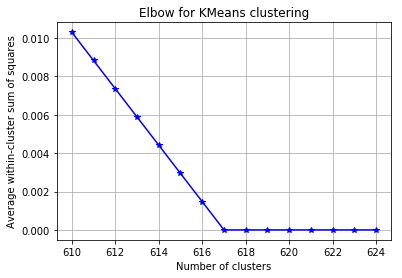

In [42]:
elbow(data_2,range(610,625)) #the elbow method over the range of k=610-625 (around 620) clearly highlights k=617 as the optimal value. 
#Besides the sum of square distances for it reaches 0, so this is ineed a perfect clustering

In [43]:
#Another option with factorization
# Factorize the data set.
# Transform the data set to factors for string terms:
data_temp=[]
for i in range(len(data2.T)): # Change for every column, one by one
    temp=data2.iloc[:,i]
    try:                      # Change it to float if possible
        temp1=temp.apply(float)
        data_temp.append(list(temp1))
    except ValueError:
        temp1=pd.factorize(temp) # Factorize it for strings if not possible
        data_temp.append(list(temp1[0]))
# Then, make it into a Pandas DataFrame:
data_q2=pd.DataFrame(data_temp).T
data_q2.columns=data2.columns
data_q2.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3781862.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3781130.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,0.0,...,1.0,0.0,0.0,0.0,3781009.0,2.0,2.0,0.0,0.0,0.0
3,0.0,0.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,0.0,...,0.0,0.0,0.0,0.0,3780501.0,2.0,3.0,0.0,0.0,0.0
4,0.0,0.0,1.0,3.0,4.0,4.0,4.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,3780511.0,1.0,1.0,1.0,0.0,0.0


In [44]:
#a good way of finding the right number of clusters in this case would be to check the clustering objective fuction - cumulative square distance
#a) For finding duplicates, we calculate the score of accuracy. We stop when we get 0 distance. The only possible
# situation is that the number of unique observations is equal to the number of clusters..
import sklearn.cluster as cluster
for i in range(610,680):
    est=cluster.KMeans(n_clusters=i)
    est.fit(data_q2)
    print(est.score(data_q2))
    if est.score(data_q2)==0:
        print('We have {} unique elements.'.format(i))
        break

-390.00390625
-298.0
-229.0
-167.0
-106.0
-54.0
-12.0
-0.0
We have 617 unique elements.


We use est.score() to find duplicates after factorizing the string variables. When we reach the point a score of 0, this means that each unique observation has its own cluster, so n_clusters is equal to the number of unique observations.

In [45]:
#b) Check the unique observations.(pandas has a good function drop_duplicates to help us):
ans=len(data_q2.drop_duplicates())
print('We have {} unique elements.'.format(ans))

We have 617 unique elements.


## Question 3
### Real world exercise. 2012 "stop and frisk" data

https://en.wikipedia.org/wiki/Stop-and-frisk_in_New_York_City

The stop-question-and-frisk program, or stop-and-frisk, in New York City, is a practice of the New York City Police Department in which police officers stop and question a pedestrian, then frisk them for weapons and other contraband; this is what is known in other places in the United States as the Terry stop. The rules for stop, question, and frisk are found in the state's criminal procedure law section 140.50, and are based on the decision of the United States Supreme Court in the case of Terry v. Ohio. About 685,724 people were stopped in 2011. However, the number of stops has been reduced dramatically since then, to 22,939 in 2015.
Stop-and-frisk got increased attention in the 2016 presidential debate.

In [27]:
data1=pd.read_csv(path+"stop_2012.csv", index_col='zipcode')
data1.head()

,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,month_April,month_August,month_December,...,month_May,month_November,month_October,month_September,time_1,time_2,time_3,time_4,time_5,time_6
zipcode,,,,,,,,,,,,,,,,,,,,,
10472,278.0,212.0,315.0,213.0,254.0,234.0,241.0,158.0,95.0,142.0,...,104.0,96.0,110.0,123.0,349.0,35.0,57.0,206.0,437.0,663.0
10037,199.0,79.0,301.0,154.0,163.0,137.0,147.0,114.0,114.0,34.0,...,67.0,53.0,65.0,96.0,271.0,38.0,32.0,143.0,248.0,448.0
10460,278.0,169.0,283.0,203.0,234.0,197.0,289.0,117.0,133.0,91.0,...,95.0,86.0,148.0,175.0,462.0,51.0,56.0,190.0,411.0,483.0
11224,175.0,82.0,177.0,176.0,180.0,179.0,206.0,112.0,67.0,134.0,...,112.0,23.0,68.0,68.0,157.0,27.0,37.0,97.0,282.0,575.0
10456,979.0,647.0,1086.0,773.0,913.0,814.0,885.0,709.0,465.0,290.0,...,518.0,395.0,521.0,511.0,1295.0,137.0,110.0,662.0,1553.0,2340.0


In [28]:
data1=data1.iloc[:,-6:]
data1.head()

,time_1,time_2,time_3,time_4,time_5,time_6
zipcode,,,,,,
10472,349.0,35.0,57.0,206.0,437.0,663.0
10037,271.0,38.0,32.0,143.0,248.0,448.0
10460,462.0,51.0,56.0,190.0,411.0,483.0
11224,157.0,27.0,37.0,97.0,282.0,575.0
10456,1295.0,137.0,110.0,662.0,1553.0,2340.0


In [29]:
#Q1. Find the 5 zip codes with most stops and visualize them

In [30]:
data1["sum"] = data1.apply(np.sum, axis = 1)
data1 = data1.sort_values(by = "sum", ascending = False)
five=list(data1.index[:5])
data1.head()

,time_1,time_2,time_3,time_4,time_5,time_6,sum
zipcode,,,,,,,
10456,1295.0,137.0,110.0,662.0,1553.0,2340.0,6097.0
10454,929.0,56.0,94.0,411.0,1194.0,1979.0,4663.0
11212,751.0,48.0,199.0,709.0,1177.0,1549.0,4433.0
11207,905.0,70.0,212.0,575.0,852.0,1452.0,4066.0
11691,574.0,24.0,119.0,539.0,845.0,1571.0,3672.0


In [31]:
five

[10456, 10454, 11212, 11207, 11691]

In [32]:
NYC_zip=gpd.read_file(path+'NY.shp')

/Users/cindy/anaconda2/lib/python2.7/site-packages/geopandas/plotting.py:389: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


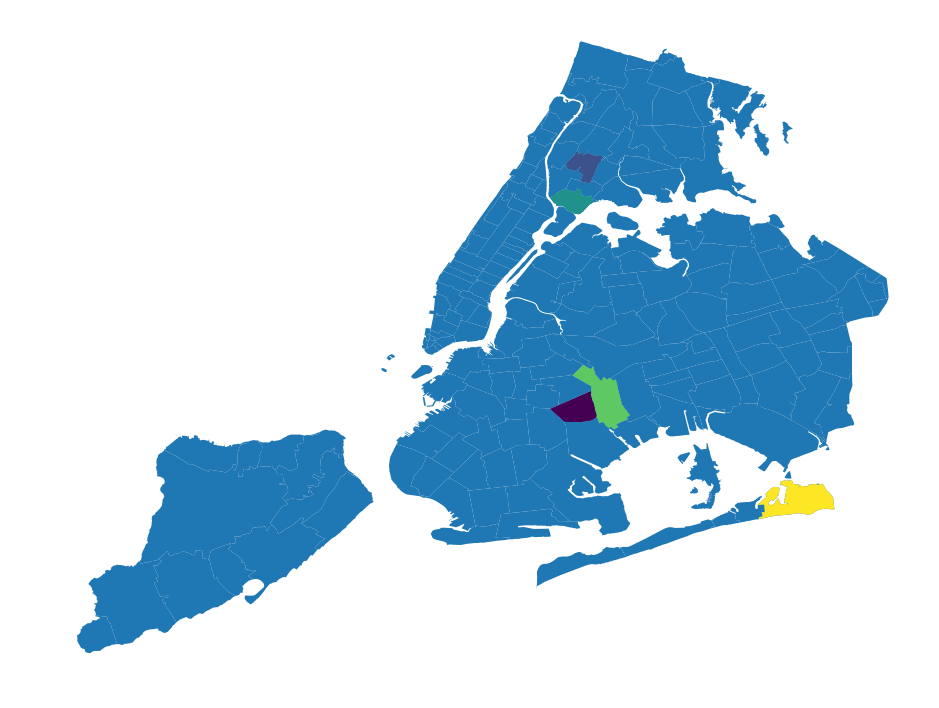

In [33]:
f, ax = plt.subplots(1, figsize = (16,16))
NYC_zip.plot(axes = ax, )
NYC_zip.merge(data1.loc[five].reset_index()).plot(axes = ax, cmap = plt.cm.viridis).axis("off")
plt.show()

visualization should be done on a map

In [34]:
#Q2 filter the data to have at least 30 stop&frisk observations

In [37]:
data1=data1.loc[data1['sum']>=30]
data1=data1.div(data1['sum'], axis=0)##除法

In [88]:
data1.shape

(155, 7)

In [89]:
data1.head()

,time_1,time_2,time_3,time_4,time_5,time_6,sum
zipcode,,,,,,,
10456,0.212400,0.022470,0.018042,0.108578,0.254715,0.383795,1.0
10454,0.199228,0.012009,0.020159,0.088141,0.256058,0.424405,1.0
11212,0.169411,0.010828,0.044891,0.159937,0.265509,0.349425,1.0
11207,0.222577,0.017216,0.052140,0.141417,0.209543,0.357108,1.0
11691,0.156318,0.006536,0.032407,0.146786,0.230120,0.427832,1.0


In [90]:
#Now if we want to cluster the zip code by the stops timeline data set. 
#(Don't forget to change your data set to numpy array form)

#Q3.Choosing the number of clusters k for Kmeans. Try both elbow method and silhouette score.

In [91]:
#normalize the data by total stops to get the timeline staying free of the effect of scale, similar to the way we dealth with 311 data in the class;
#those solutions missing this step still get the full credit as it was not explicitely spelled in the assignment

In [92]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

('For n_clusters =', 2, 'The average silhouette_score is :', 0.44702964214105684)
('For n_clusters =', 3, 'The average silhouette_score is :', 0.3557401291757944)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.2662245029552834)
('For n_clusters =', 5, 'The average silhouette_score is :', 0.23606993014921282)
('For n_clusters =', 6, 'The average silhouette_score is :', 0.24442299545746823)
('For n_clusters =', 7, 'The average silhouette_score is :', 0.24358215394579566)
('For n_clusters =', 8, 'The average silhouette_score is :', 0.23674790058778183)
('For n_clusters =', 9, 'The average silhouette_score is :', 0.2450320152592634)
('For n_clusters =', 10, 'The average silhouette_score is :', 0.23671643637552103)
('For n_clusters =', 11, 'The average silhouette_score is :', 0.2449381258536802)


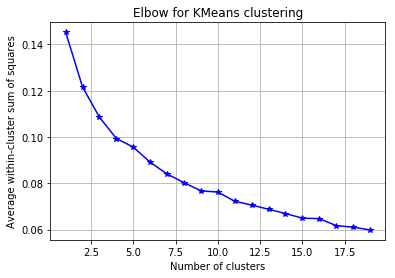

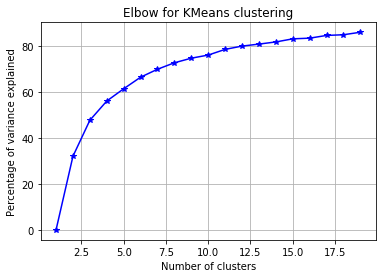

In [93]:
X=np.asarray(data1.iloc[:,:-1])
range_n_clusters = range(2,12)


for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
#elbow
elbow(X,range(1,20))

In [94]:
#there is some ambiquity with choosing the best number of clusters from Elbow, but Silhuette makes a clear case for k=2
#However, any k from 2 to 5 will be accepted

In [95]:
#Q4&Q5. Using kmeans to cluster the zip codes.Choose a k as you wish from your elbow and SS result. And save your result as
#the following dataframe/form.

In [106]:
n=2 # number of clusters.

# Guassian Mixture:
from sklearn.mixture import GaussianMixture
GM=GaussianMixture(n_components=n)
GM.fit(data1.iloc[:,:-1])
res_Mix=GM.predict(data1.iloc[:,:-1])

#Kmeans
import sklearn.cluster as cluster
KM=cluster.KMeans(n_clusters=n)
KM.fit(data1.iloc[:,:-1])
res_KM=KM.predict(data1.iloc[:,:-1])

In [107]:
#merge the result with zipcodes for graph plotting
res_Mix={data1.index[i]:res_Mix[i] for i in range(len(res_Mix))}
res_KM={data1.index[i]:res_KM[i] for i in range(len(res_KM))}

In [108]:
#Visuilize the result on the map 

# For this part you need to: 
#(1) Make sure that your result of Q4 is in the correct form.
#(2) Make sure NY.shp, NY.shx, NY.dbf are downloaded in your working directory.
#(3) Use the defined function plot_on_map(your_result)

In [109]:
#read shapefiles of NYC zip codes
import geopandas as gpd
NYCzip=gpd.read_file(path+'NY.shp')

In [110]:
#add a function visualizing shapes by cluster
from matplotlib.colors import LinearSegmentedColormap
colors=['green','blue','red','yellow','magenta','green','blue','red','yellow','magenta']
def plot_on_map(gdf,Y): #take geopandas dataframe gdf with zip code shapefiles and the dictionary mapping zip codes to clusters
    #visualize zip codes using clusters for picking colors        
    f, ax = plt.subplots(1, figsize=(12, 12))     
    for c in range(max(Y.values())+1): #for each cluster
        gdf.loc[gdf.zipcode.map(Y)==c].plot(axes=ax, color=colors[c]) #visualize zip codes which belong to it using cluster color

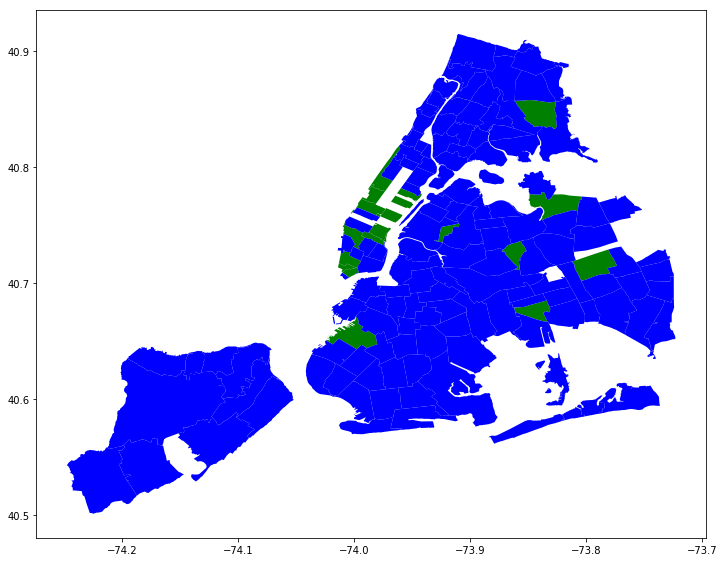

In [111]:
plot_on_map(NYCzip,res_KM)

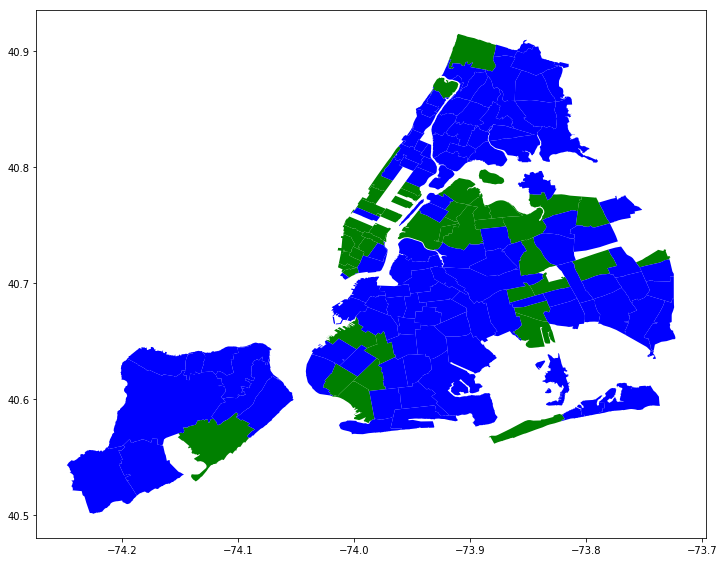

In [112]:
plot_on_map(NYCzip,res_Mix)